## 1. 라이브러리 및 데이터 불러오기

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [54]:
predict = pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/4. modelling/polarity_scoring/KoELECTRA/predict_koelectra.xlsx")
extra = pd.read_excel("extra_score.xlsx")
industry = pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/2. preprocessing/dart/company_info.xlsx")
# temp=pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/4. modelling/polarity_scoring/KoELECTRA/predict_koelectra1.xlsx")

## 2. 감정분류값 전처리

In [55]:
# 부정값(0) -> 음수화(-1)
predict['predicted'].loc[predict['predicted'] == 0] = -1

C:\Users\hanah\AppData\Local\Temp\ipykernel_23296\2274638855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['predicted'].loc[predict['predicted'] == 0] = -1


In [415]:
# 감정분류에 따른 E/S/G 개별점수화
predict['Escore'] = predict['Ecnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict['Sscore'] = predict['Scnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict['Gscore'] = predict['Gcnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict.fillna(0, inplace=True)
predict.head()

,id,year,doc,content,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore
0,1,2020,원수가 다니겠다고 하면 도시락 싸 들고 환영할 회사 중소기업의 흔한 사건사고 단점 ...,장점 꼰대 문화가 별로 없고 변화와 발전 추구함 투자를 많이 받고 있기 때문에 사...,0,4,3,-1,-0.0,-0.571429,-0.428571
1,1,2020,앞으로도 더 성장 할 가능성이 높은 회사,장점 직원들에게 많은 기회를 준다 한가지만 보지 않고 다양한 분야에서 어떻게 인재가...,0,0,2,1,0.0,0.000000,1.000000
2,1,2020,블리츠웨이 300 꿈의 장난감 볼트론 피규어로 매출 100억원 기대,피규어 전문제작사 블리츠웨이가 출시 예정인 볼트론이 사전예약 첫 날 자체 예약 최고...,0,0,0,1,0.0,0.000000,0.000000
3,1,2020,배용준도 투자한 블리츠웨이 코스닥 예비심사 통과 정밀 피규어 최초 상장 기대,피규어 개발 및 제작 전문 기업 블리츠웨이가 코스닥 상장을 위한 예비 심사를 통과했...,0,0,0,1,0.0,0.000000,0.000000
4,1,2020,대신밸런스제9호스팩 블리츠웨이와 합병 승인 12월 코스닥 상장,대신밸런스제9호스팩은 피규어 개발 제작 전문 기업 블리츠웨이 와 합병상장을 위한 ...,0,0,0,1,0.0,0.000000,0.000000


In [410]:
# 기업, 년도별 점수 합산
predict_sum = predict.groupby(['id','year']).sum().reset_index()
predict_sum.describe()

C:\Users\hanah\AppData\Local\Temp\ipykernel_10180\1846089639.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  predict_sum = predict.groupby(['id','year']).sum().reset_index()


,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,682.959703,2020.501565,1.540689,18.660407,27.805947,3.774257,0.367157,0.949459,-0.333439
std,398.661749,0.500095,6.134461,14.337438,16.535838,13.512345,1.176370,3.615770,6.955879
min,1.000000,2020.000000,0.000000,0.000000,0.000000,-27.000000,-3.437500,-11.366667,-22.833333
25%,334.750000,2020.000000,0.000000,7.000000,13.000000,-4.000000,0.000000,-1.000000,-4.370833
50%,683.500000,2021.000000,0.000000,17.000000,32.500000,1.000000,0.000000,0.412500,0.000000
75%,1025.000000,2021.000000,0.000000,27.250000,40.000000,9.000000,0.000000,2.433333,3.127976
max,1382.000000,2021.000000,94.000000,126.000000,121.000000,111.000000,14.199242,21.880952,35.650000


In [416]:
# 기업, 년도별 점수 평균화
predict_mean = predict.groupby(['id','year']).mean().reset_index()
predict_mean.describe()

C:\Users\hanah\AppData\Local\Temp\ipykernel_10180\1522246494.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  predict_mean = predict.groupby(['id','year']).mean().reset_index()


,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,682.959703,2020.501565,0.065566,0.650697,1.022392,0.121274,0.014087,0.030516,-0.009856
std,398.661749,0.500095,0.346512,0.460300,0.636176,0.451815,0.055731,0.143707,0.295802
min,1.000000,2020.000000,0.000000,0.000000,0.000000,-1.000000,-0.200000,-1.000000,-1.000000
25%,334.750000,2020.000000,0.000000,0.420217,0.882353,-0.200000,0.000000,-0.045069,-0.189459
50%,683.500000,2021.000000,0.000000,0.612941,1.043478,0.103652,0.000000,0.016429,0.000000
75%,1025.000000,2021.000000,0.000000,0.828571,1.187500,0.430403,0.000000,0.100000,0.156716
max,1382.000000,2021.000000,8.000000,8.428571,26.250000,1.000000,1.000000,1.000000,1.000000


## 3. 감정스코어 이외 가감점 반영

In [417]:
# 방안 1) 기업, 년도별 점수 평균화
predict_mean = pd.merge(predict_mean, extra, on=['id','year'], how='left')
predict_mean.fillna(0, inplace=True)
predict_mean

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,major_50,adt_bad,hazard_pdt,green_pdt,patent
0,1,2020,0.0625,0.312500,0.562500,0.625000,0.03125,-0.004464,-0.089286,0.0,0.0,0.0,0.0,0.0
1,1,2021,0.0000,0.750000,0.750000,0.125000,0.00000,-0.125000,-0.062500,-1.0,0.0,0.0,0.0,0.0
2,2,2020,0.1200,0.400000,0.480000,0.280000,0.00000,-0.030000,0.030000,0.0,0.0,0.0,0.0,0.0
3,2,2021,0.0000,0.190476,0.476190,0.428571,0.00000,-0.047619,0.142857,0.0,0.0,0.0,0.0,0.0
4,3,2020,0.0000,0.478261,1.130435,0.565217,0.00000,0.159420,0.318841,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0.0000,0.000000,0.500000,0.000000,0.00000,0.000000,-0.500000,0.0,0.0,0.0,0.0,0.0
2552,1381,2020,0.0000,0.333333,1.000000,1.000000,0.00000,0.166667,0.833333,0.0,0.0,0.0,0.0,0.0
2553,1381,2021,0.0000,1.500000,1.000000,0.000000,0.00000,0.083333,-0.083333,0.0,0.0,0.0,0.0,0.0
2554,1382,2020,0.0000,0.250000,1.500000,0.000000,0.00000,0.125000,-0.125000,0.0,0.0,0.0,0.0,0.0


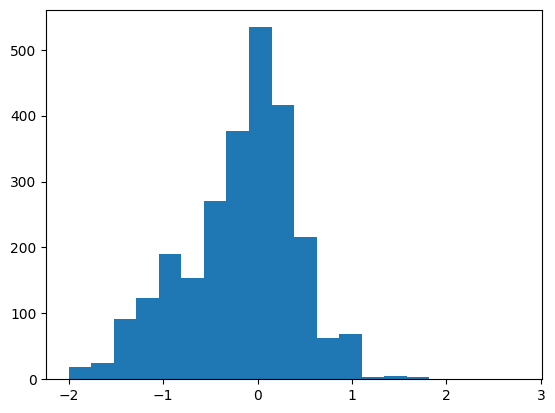

In [418]:
predict_mean['Escore'] = predict_mean['Escore'] + predict_mean['hazard_pdt'] + predict_mean['green_pdt'] +  predict_mean['patent'] 
predict_mean['Gscore'] = predict_mean['Gscore'] + predict_mean['major_50'] +  predict_mean['adt_bad']

predict_mean['TotalScore'] = predict_mean['Escore'] + predict_mean['Sscore'] + predict_mean['Gscore']
plt.hist(predict_mean['TotalScore'], bins = 20);

In [9]:
def get_ratio(score, start=float, end=float):
    cnt = score[(score > start) & (score <= end)]
    print(f"{start}초과 {end}이하 : {len(cnt) / len(score) * 100:.2f}%")

In [424]:
print(get_ratio(predict_extra['TotalScore1'], 9, 10))
print(get_ratio(predict_extra['TotalScore1'], 6, 9))
print(get_ratio(predict_extra['TotalScore1'], 3, 6))
print(get_ratio(predict_extra['TotalScore1'], 0, 3))
print(get_ratio(predict_extra['TotalScore1'], -3, 0))
print(get_ratio(predict_extra['TotalScore1'], -5, -3))

2초과 4이하 : 0.04%
None
1초과 2이하 : 0.59%
None
0초과 1이하 : 39.36%
None
-1초과 0이하 : 46.75%
None
-3초과 -1이하 : 13.26%
None


In [421]:
predict_mean.drop(['major_50', 'adt_bad', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1, inplace=True)
predict_mean.to_excel('predict_mean2.xlsx')

In [411]:
# 방안 2) 
predict_extra = pd.merge(predict_sum, extra, on=['id','year'], how='left')
predict_extra.fillna(0, inplace=True)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,major_50,adt_bad,hazard_pdt,green_pdt,patent
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,0.0,0.0,0.0,0.0,0.0
1,1,2021,0,12,12,2,0.0,-2.000000,-1.000000,-1.0,0.0,0.0,0.0,0.0
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.0,0.0,0.0,0.0,0.0
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,0.0,0.0,0.0,0.0,0.0
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,0.0,0.0,0.0,0.0,0.0
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,0.0,0.0,0.0,0.0,0.0
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.0,0.0,0.0,0.0,0.0


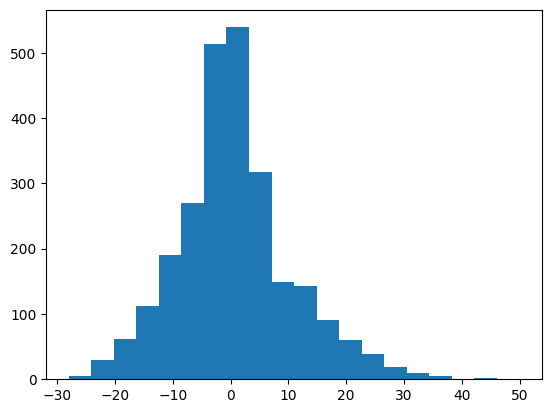

In [412]:
predict_extra['Escore'] = predict_extra['Escore'] + predict_extra['hazard_pdt'] + predict_extra['green_pdt'] +  predict_extra['patent']
predict_extra['Gscore'] = predict_extra['Gscore'] + predict_extra['major_50'] +  predict_extra['adt_bad']

predict_extra['TotalScore'] = predict_extra['Escore'] + predict_extra['Sscore'] + predict_extra['Gscore']
plt.hist(predict_extra['TotalScore'], bins = 20);

## 4. 데이터셋 스케일링

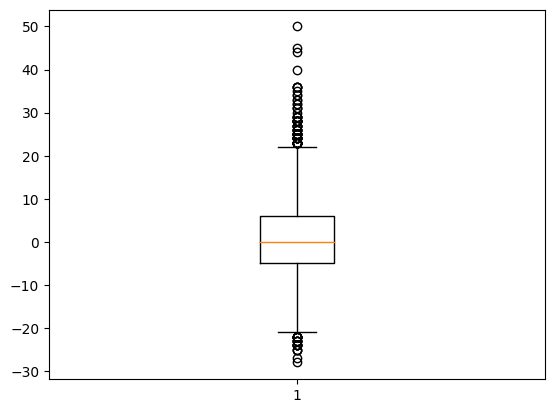

In [297]:
plt.boxplot(predict_extra['TotalScore']);

In [306]:
# 방안 1)기업별 문서수의 영향력을 줄이기 위해 ESG 통합점수를 ln(기업 및 연도별 문서수)+1로 나누기
for idx in range(len(predict_extra)):
    predict_extra.loc[idx, 'TotalScore1'] = predict_extra.loc[idx, 'TotalScore'] / (np.log(len(predict.id[predict.id == predict_extra.id[idx]]))+1)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,major_50,adt_bad,hazard_pdt,green_pdt,patent,TotalScore,TotalScore1
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,0.0,0.0,0.0,0.0,0.0,-1.000000e+00,-2.239273e-01
1,1,2021,0,12,12,2,0.0,-2.000000,-2.000000,-1.0,0.0,0.0,0.0,0.0,-4.000000e+00,-8.957090e-01
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,0.0,0.0,0.0,0.0,0.0,2.000000e+00,4.141952e-01
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,0.0,0.0,0.0,0.0,0.0,1.100000e+01,2.299240e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.000000e+00,-5.906161e-01
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,0.0,0.0,0.0,0.0,0.0,3.000000e+00,1.149673e+00
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,-2.127322e-17
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00


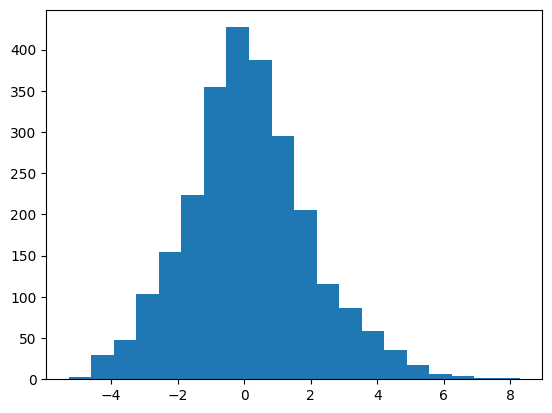

In [307]:
predict_extra.drop(['major_50', 'adt_bad', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1, inplace=True)
plt.hist(predict_extra['TotalScore1'], bins = 20);

In [332]:
print(get_ratio(predict_extra['TotalScore1'], 9, 10))
print(get_ratio(predict_extra['TotalScore1'], 6, 9))
print(get_ratio(predict_extra['TotalScore1'], 3, 6))
print(get_ratio(predict_extra['TotalScore1'], 0, 3))
print(get_ratio(predict_extra['TotalScore1'], -3, 0))
print(get_ratio(predict_extra['TotalScore1'], -5, -3))

9초과 10이하 : 0.00%
None
6초과 9이하 : 0.43%
None
3초과 6이하 : 6.85%
None
0초과 3이하 : 41.31%
None
-3초과 0이하 : 46.71%
None
-5초과 -3이하 : 4.62%
None


In [308]:
# 방안 2)표준화
scaler = StandardScaler()
predict_extra['TotalScore2'] = scaler.fit_transform(predict_extra[['TotalScore']])
predict_extra.drop(['major_50', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1, inplace=True)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,TotalScore,TotalScore1,TotalScore2
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,-1.000000e+00,-2.239273e-01,-0.178508
1,1,2021,0,12,12,2,0.0,-2.000000,-2.000000,-4.000000e+00,-8.957090e-01,-0.481675
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.000000e+00,0.000000e+00,-0.077452
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,2.000000e+00,4.141952e-01,0.124659
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,1.100000e+01,2.299240e+00,1.034160
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,-1.000000e+00,-5.906161e-01,-0.178508
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,3.000000e+00,1.149673e+00,0.225715
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,-5.551115e-17,-2.127322e-17,-0.077452
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.000000e+00,0.000000e+00,-0.077452


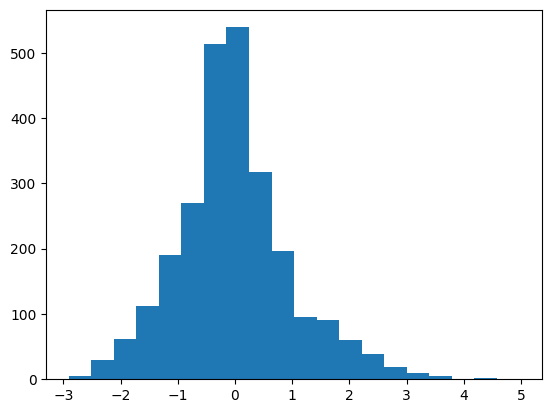

In [309]:
plt.hist(predict_extra['TotalScore2'], bins = 20);

In [333]:
print(get_ratio(predict_extra['TotalScore2'], 4.5, 6))
print(get_ratio(predict_extra['TotalScore2'], 3, 4.5))
print(get_ratio(predict_extra['TotalScore2'], 1.5, 3))
print(get_ratio(predict_extra['TotalScore2'], 0, 1.5))
print(get_ratio(predict_extra['TotalScore2'], -1.5, 0))
print(get_ratio(predict_extra['TotalScore2'], -5, -1.5))

4.5초과 6이하 : 0.04%
None
3초과 4.5이하 : 0.67%
None
1.5초과 3이하 : 7.00%
None
0초과 1.5이하 : 39.75%
None
-1.5초과 0이하 : 46.67%
None
-5초과 -1.5이하 : 5.87%
None


## 5. 점수 구간별 등급화

In [65]:
predict_extra = pd.read_excel('predict_industry.xlsx')
predict_extra

,CmpID,Year,Ecnt,Scnt,Gcnt,TonePolarity,Escore,Sscore,Gscore,TotalScore,Egrade,Sgrade,Ggrade,TotalGrade,TotalRanking,IndRanking
0,1,2020,0.062,0.312,0.562,0.625,0.031,-0.004,-0.089,-0.062,B,C,C,C,21.283,15.297
1,1,2021,0.000,0.750,0.750,0.125,0.000,-0.125,-1.062,-1.188,C,C,D,D,39.358,29.225
2,2,2020,0.120,0.400,0.480,0.280,0.000,-0.030,0.030,0.000,C,C,B,C,18.232,12.598
3,2,2021,0.000,0.190,0.476,0.429,0.000,-0.048,0.143,0.095,C,C,B,B,14.280,9.781
4,3,2020,0.000,0.478,1.130,0.565,0.000,0.159,0.319,0.478,C,B,B,B,4.460,3.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0.000,0.368,1.000,0.000,0.000,0.079,-1.105,-1.026,C,B,D,D,37.363,0.978
2552,1381,2020,0.000,0.333,1.000,1.000,0.000,0.167,0.833,1.000,C,B,A,B,0.587,0.039
2553,1381,2021,0.000,1.500,1.000,0.000,0.000,0.083,-0.083,-0.000,C,B,C,C,18.466,0.391
2554,1382,2020,0.000,0.250,1.500,0.000,0.000,0.125,-0.125,0.000,C,B,C,C,18.232,12.598


In [66]:
scaler = MinMaxScaler()
predict_extra['Egrade'] = scaler.fit_transform(predict_extra[['Escore']])
predict_extra['Sgrade'] = scaler.fit_transform(predict_extra[['Sscore']])
predict_extra['Ggrade'] = scaler.fit_transform(predict_extra[['Gscore']])

In [73]:
label = ['D', 'C', 'B',  'A', 'S']
bin1 = [-10, -1, 0, 1, 2, 10]
bin2 = [-10, -0.5, 0, 1, 5, 10]
predict_extra['TotalGrade'] = pd.cut(predict_extra['TotalScore'], bin1, right=True, labels=label)
predict_extra['Egrade'] = pd.cut(predict_extra['Escore'], bin2, right=True, labels=label)
predict_extra['Sgrade'] = pd.cut(predict_extra['Sscore'], bin2, right=True, labels=label)
predict_extra['Ggrade'] = pd.cut(predict_extra['Gscore'], bin2, right=True, labels=label)

print(predict_extra['TotalGrade'].value_counts())
print(predict_extra['Egrade'].value_counts())
print(predict_extra['Sgrade'].value_counts())
print(predict_extra['Ggrade'].value_counts())

C    1133
B     951
D     460
A      12
S       0
Name: TotalGrade, dtype: int64
C    2000
B     540
A      12
D       4
S       0
Name: Egrade, dtype: int64
B    1345
C    1197
D      13
A       1
S       0
Name: Sgrade, dtype: int64
C    933
B    877
D    746
A      0
S      0
Name: Ggrade, dtype: int64


In [544]:
predict_extra['TotalRanking'] = predict_extra['TotalScore'].rank(method='dense', ascending=False) / len(predict_extra) * 100

industry = industry[['CmpID', 'ind_code']]
predict_industry = pd.merge(predict_extra, industry, on='CmpID', how='left')
predict_industry['IndRanking'] = predict_industry.groupby('ind_code')['TotalScore'].rank(method='dense', ascending=False) / len(predict_extra) * 100
predict_industry.drop('ind_code', axis=1, inplace=True)

In [551]:
predict_industry=predict_industry[['CmpID','Year', 'Ecnt', 'Scnt', 'Gcnt', 'TonePolarity', 'Escore', 'Sscore', 'Gscore',
                                   'TotalScore', 'Egrade', 'Sgrade', 'Ggrade', 'TotalGrade', 'TotalRanking', 'IndRanking']]
pd.options.display.float_format = '{:.3f}'.format
predict_industry

,CmpID,Year,Ecnt,Scnt,Gcnt,TonePolarity,Escore,Sscore,Gscore,TotalScore,Egrade,Sgrade,Ggrade,TotalGrade,TotalRanking,IndRanking
0,1,2020,0.062,0.312,0.562,0.625,0.031,-0.004,-0.089,-0.062,B,C,C,C,21.283,15.297
1,1,2021,0.000,0.750,0.750,0.125,0.000,-0.125,-1.062,-1.188,C,C,D,D,39.358,29.225
2,2,2020,0.120,0.400,0.480,0.280,0.000,-0.030,0.030,0.000,C,C,B,C,18.232,12.598
3,2,2021,0.000,0.190,0.476,0.429,0.000,-0.048,0.143,0.095,C,C,B,B,14.280,9.781
4,3,2020,0.000,0.478,1.130,0.565,0.000,0.159,0.319,0.478,C,B,B,B,4.460,3.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0.000,0.368,1.000,0.000,0.000,0.079,-1.105,-1.026,C,B,D,D,37.363,0.978
2552,1381,2020,0.000,0.333,1.000,1.000,0.000,0.167,0.833,1.000,C,B,A,B,0.587,0.039
2553,1381,2021,0.000,1.500,1.000,0.000,0.000,0.083,-0.083,-0.000,C,B,C,C,18.466,0.391
2554,1382,2020,0.000,0.250,1.500,0.000,0.000,0.125,-0.125,0.000,C,B,C,C,18.232,12.598


In [76]:
predict_industry.to_excel('predict_industry1.xlsx')